<a href="https://colab.research.google.com/github/Adaline-K/git4-collaboration-sourcetree/blob/master/tensor_image01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#tensorflows와 tf.keras를 임포트함
import tensorflow as tf
from tensorflow import keras

#Helper라이브러리를 임포트함
import numpy as np
import matplotlib.pyplot as plt


print(tf.__version__)


2.4.1


# **1.데이터 로드**

In [ ]:

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) =fashion_mnist.load_data()

#load_data()함수호출: 28ㅌ28 넘파이 배열, 픽셀값은 0과 255사이fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) =fashion_mnist.load_data()

#load_data()함수호출: 28X28 넘파이 배열, 픽셀값은 0과 255사이 레이블은 0~9사이 정수 배열

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
#데이터 탐색
train_images.shape

(60000, 28, 28)

In [10]:
len(train_labels)

60000

In [13]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

# **2.데이터 전처리**

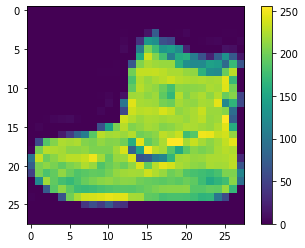

In [17]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [19]:
#신경망 모델에 주입하기 전에 값의 범위를 0~1로 조정함, 255로 나눔
train_images = train_images / 255.0
test_images = test_images /255.0 

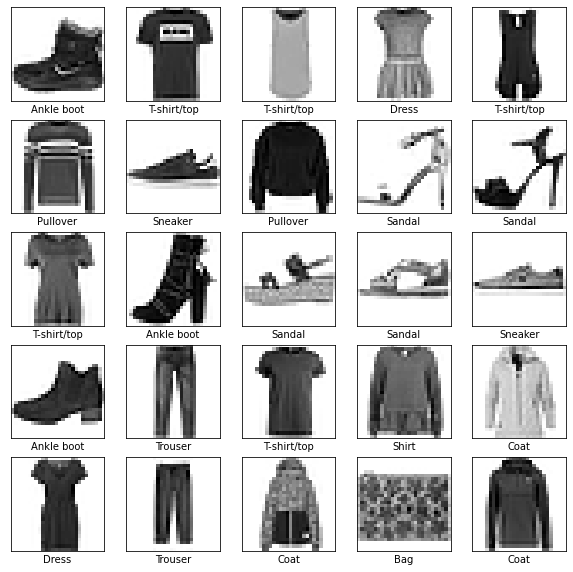

In [20]:
# 훈련세트에서 처음 25개 이미지와 그 아래 클래스 이름 출력
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap= plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

# **3.모델구성(신경망: 층설정)**

In [21]:
##1.층설정
model = keras. Sequential([
             keras.layers.Flatten(input_shape=(28,28)),
             keras.layers.Dense(128, activation= 'relu'),
             keras.layers.Dense(10, activation='softmax')  
                       ])
#첫번째 층(Flatten-2차원 배열(28X28 => 784픽셀의 1차원 배열로 변환)
#두번째 층(Fully densely-cnnected), 128 node neuron
#세번째 층(10개의 소프트맥스 층-> 10개의 확률을 반환하고 반환된 값의 전체 합은 1)
#Relu 함수-Rectified Linear Unit=> 입력이 0이하면 0으로 침묵, 0을 넘으면 입력 그대로 출력
#softmax classification 목적으로 쓰이는 활성화 함수수

# **4.모델컴파일**

In [22]:
#손실함수(loss-fuction): 훈련하는 동안 모델의 오차를 측정, 모델의 학습이 올바른 방향으로 향하도록 이를 최소화함
#Optimizer:데이터와 손실함수를 바탕으로 모델의 업데이트 방법 결정
#지표(Metrics)-훈련 단계와 테스트 단계를 모니터링 하기 위해 사용.올바르게 분류된 이미지의 비율인 정확도 사용

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## **5.모델훈련**

In [ ]:
model.fit(train_images, train_labels, epochs=20)

# **6.정확도 평가**

In [27]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest Acuuracy:', test_acc)

#훈련세트의 정확동와 테스트 세트의 정확도 사이의 차이는 과대적합(Overfitting)때문임
#머신러닝 모델이 훈련 데이터보다 새로운 데이터에서 성능이 낮아지는 현상ㅇ

313/313 - 0s - loss: 0.3969 - accuracy: 0.8837

Test Acuuracy: 0.8837000131607056


# **7.예측만들기**

In [28]:
predictions = model.predict(test_images)
#테스트 세트에 있는 각 이미지의 레이블 예측(0부터 9까지)

In [29]:
predictions[0]
#10개의 옷 품목에 상응하는 모델의 신뢰도(Confidence) 나타냄

array([2.0829791e-07, 1.7205080e-13, 5.1311082e-07, 2.8657149e-10,
       4.0674817e-14, 3.4444608e-06, 3.4591785e-10, 4.0308293e-04,
       2.3604310e-10, 9.9959272e-01], dtype=float32)

In [30]:
np.argmax(predictions[0]) #모델은 이미지가 앵클부츠라고 예측

9

In [32]:
test_labels[0]

9

In [38]:
#이미지 클래스를 예측하여 그래프/신뢰도를 출력하는 함수

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

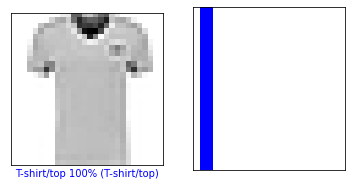

In [46]:
i=59
plt.figure(figsize =(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

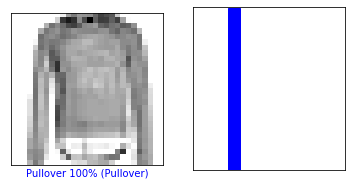

In [43]:
i=16
plt.figure(figsize =(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

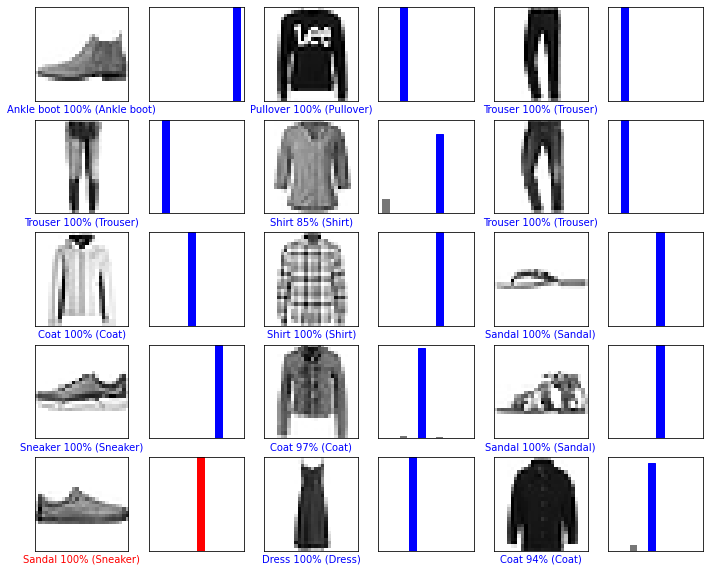

In [47]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [49]:
#훈련된 모델을 사용하여 이미지에 대한 예측을 만듦

img = test_images[0]
print(img.shape)

(28, 28)


In [50]:
#이미지 하나만 사용할 때도 배치에 추가함
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [51]:
predictions_single = model.predict(img)
print(predictions_single)

[[2.0829812e-07 1.7205112e-13 5.1311082e-07 2.8657202e-10 4.0674661e-14
  3.4444574e-06 3.4591721e-10 4.0308334e-04 2.3604174e-10 9.9959272e-01]]


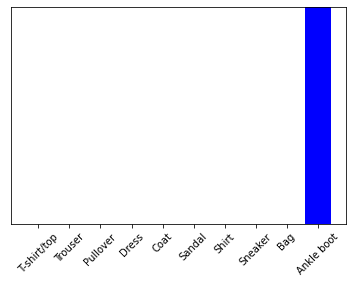

In [52]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [53]:
np.argmax(predictions_single[0])
          

9